### import des librairies de base

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from ipywidgets import interactive, VBox, Button
from IPython.display import display

### Mod√®le de croissance exponentielle, sans contrainte et avec taux de croissance constante
Le mod√®le se pr√©sente comme suit : $$\frac{dN(t)}{dt} = r*N(t) $$
Dont la solution est : $$ N(t) = N_{0}e^{rt}$$
o√π $N_0$ est la population initial

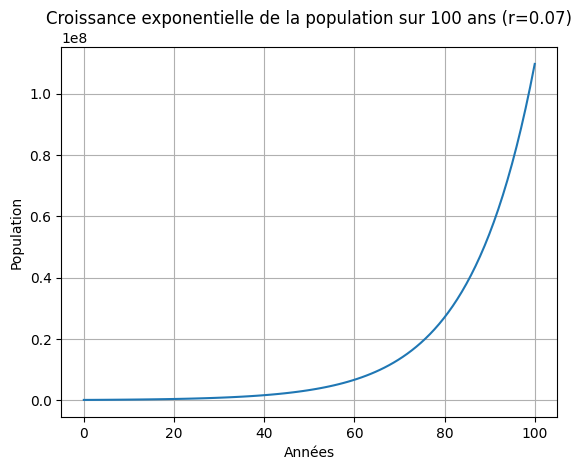

In [10]:
# Modelisation
## Parameters
n_0 = 100000 # initial population
r = 0.07 #growth rate, pour un pays africain ou d'asie du sud est(ou ouest)
### On suppose que dt est de l'ordre de le l'ann√©e
## On suppose que la simulation se passe sur un  100 ans.
T = np.linspace(0, 100, 100)

## L'evolution de la population :
N = n_0*np.exp(r*T)

# Cr√©ation d'une nouvelle figure
plt.figure()

# Trac√© des r√©sultats
plt.plot(T, N, label='Population')
plt.xlabel('Ann√©es')
plt.ylabel('Population')
plt.title(f'Croissance exponentielle de la population sur {round(np.max(T))} ans (r={r})')
plt.grid(True)  # Ajout de la grille
plt.show()

### Mod√®le de croissance exponentielle, sans contrainte et avec taux de croissance variable
Le mod√®le se pr√©sente comme suit : $$\frac{dN(t)}{dt} = r(t)*N(t) $$
Dont la solution est : $$ N(t) = N_{0}e^{r(t)t}$$
o√π $N_0$ est la population initial.

Pour simuler la variation du taux de croissance de la population, on va utiliser, dans un premier temps, une fonction sigmoidale ou logistique.
Une fonction sigmo√Ødale ou logistique a cette forme g√©n√©rale :


$$ r(t) = \frac{K}{1 + e^{-a(t - t_0)}} $$

O√π :

- $K$ est le taux de croissance maximal (au milieu de la p√©riode),
- $a$ contr√¥le la vitesse √† laquelle la croissance s'acc√©l√®re,
- $t_0$ d√©termine le point o√π la croissance est la plus rapide.

Cela nous permettra d'avoir une croissance lente au d√©but, une acc√©l√©ration rapide au milieu, et une stabilisation vers la fin.

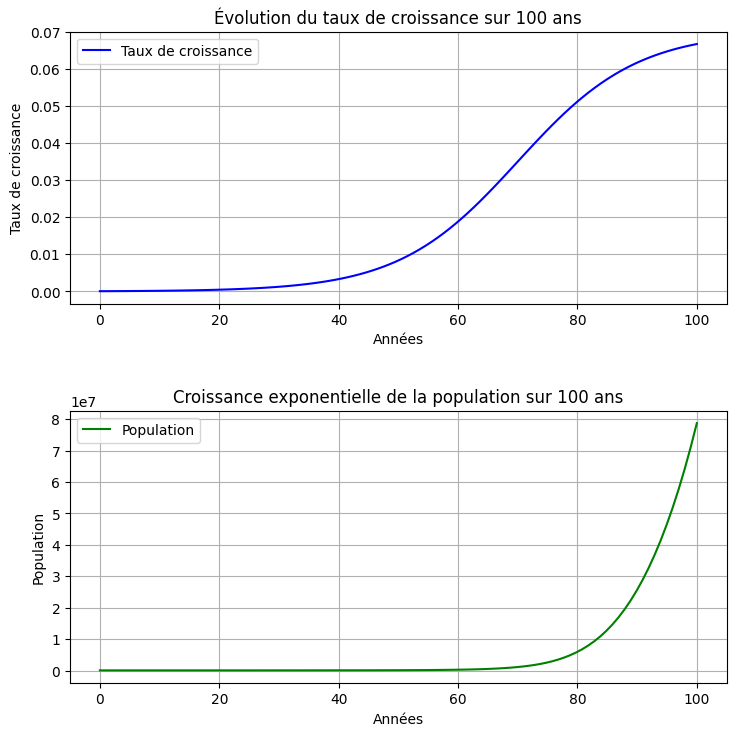

In [9]:
# Mod√©lisation de la croissance d√©mographique

## Param√®tres
n_0 = 100000  # Population initiale
K = 0.07  # Taux de croissance maximal, adapt√© pour un pays africain ou d'Asie du Sud-Est (ou Ouest)
T_0 = 70  # L'ann√©e o√π la croissance est la plus rapide
a = 0.1  # Vitesse √† laquelle la croissance s'acc√©l√®re
### On suppose que dt est de l'ordre de l'ann√©e

## Simulation sur 100 ans
T = np.linspace(0, 100, 100)  # Temps simul√© sur 100 ans

## Fonction du taux de croissance :
r = K / (1 + np.exp(-a * (T - T_0)))

## √âvolution de la population :
N = n_0 * np.exp(r * T)

# Cr√©ation d'une nouvelle figure avec des sous-graphiques
fig, axs = plt.subplots(2, figsize=(8, 8))  # Ajustement de la taille de la figure

# Trac√© du taux de croissance
axs[0].plot(T, r, label="Taux de croissance", color='blue')
axs[0].set_title(f'√âvolution du taux de croissance sur {round(np.max(T))} ans')
axs[0].set_xlabel('Ann√©es')
axs[0].set_ylabel('Taux de croissance')
axs[0].grid(True)
axs[0].legend()

# Trac√© de la population
axs[1].plot(T, N, label="Population", color='green')
axs[1].set_title(f'Croissance exponentielle de la population sur {round(np.max(T))} ans')
axs[1].set_xlabel('Ann√©es')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Affichage du graphique
plt.show()

### Autres fonction pour simuler l'evolution du taux de croissance

Cette fois, nous cherchons a simuler un taux de croissance qui : 
- Cro√Æt lentement au d√©but,
- Explose au milieu,
- D√©cro√Æt √† la fin.

On pourrait mod√©liser cela avec  **la fonction gaussienne (ou densit√© normale)**. Cette fonction a la forme g√©n√©rale :


$$ f(t) = A \cdot e^{-\left( \frac{t - t_0}{b} \right)^2} $$

O√π :
- $A$ contr√¥le l'amplitude maximale (√† quel point la fonction "explose" au milieu),
- $t_0$ est le point o√π la fonction atteint son maximum,
- $b$ contr√¥le la largeur de la cloche (si $b$ est petit, la courbe est plus √©troite, si \( b \) est grand, la courbe est plus large).

Cette fonction commence lentement, atteint un maximum au milieu (autour de $t_0$), puis redescend rapidement.

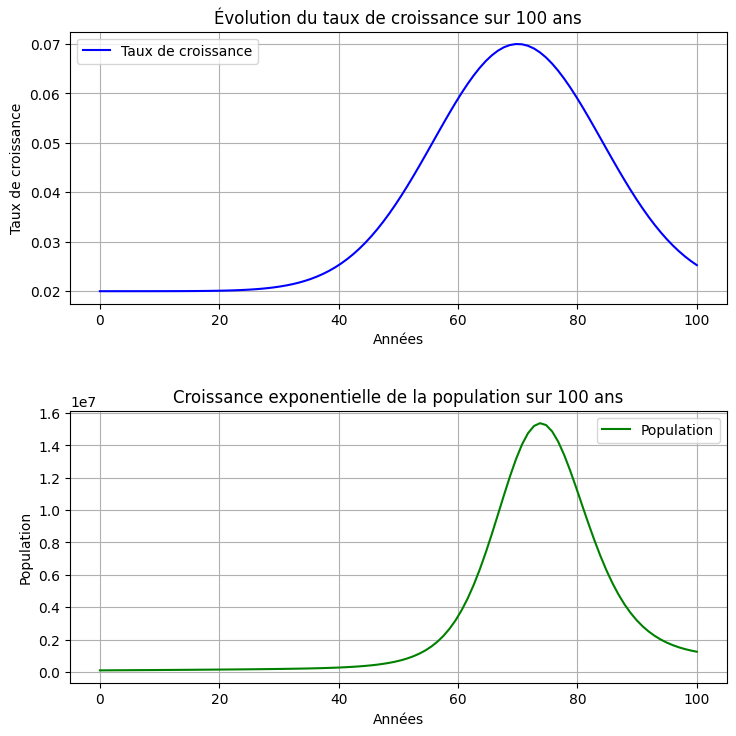

In [13]:
# Mod√©lisation de la croissance d√©mographique

## Param√®tres
n_0 = 100000  # Population initiale
A = 0.05  # √©cart maximale (~7% sera lee taux de croissance au milieu)
min_val = 0.02 # le taux de croissance minimal. Le taux de croissance maximal sera min_val + A
T_0 = 70  # L'ann√©e o√π la fonction atteint son maximum (au milieu de la p√©riode)
b = 20  # Largeur de la cloche (contr√¥le la dur√©e de la phase de croissance)
### On suppose que dt est de l'ordre de l'ann√©e

## Simulation sur 100 ans
T = np.linspace(0, 100, 100)  # Temps simul√© sur 100 ans

## Fonction du taux de croissance :
r = min_val + A*np.exp(-1 * ((T - T_0)/b)**2)

## √âvolution de la population :
N = n_0 * np.exp(r * T)

# Cr√©ation d'une nouvelle figure avec des sous-graphiques
fig, axs = plt.subplots(2, figsize=(8, 8))  # Ajustement de la taille de la figure

# Trac√© du taux de croissance
axs[0].plot(T, r, label="Taux de croissance", color='blue')
axs[0].set_title(f'√âvolution du taux de croissance sur {round(np.max(T))} ans')
axs[0].set_xlabel('Ann√©es')
axs[0].set_ylabel('Taux de croissance')
axs[0].grid(True)
axs[0].legend()

# Trac√© de la population
axs[1].plot(T, N, label="Population", color='green')
axs[1].set_title(f'Croissance exponentielle de la population sur {round(np.max(T))} ans')
axs[1].set_xlabel('Ann√©es')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Affichage du graphique
plt.show()

### Mod√®le logistique ou mod√®le de Verhust

L'√©quation diff√©rentielle du mod√®le logistique de Verhulst se pr√©sente comme suit : $$ \frac{dN}{dt} = r*N(t)*(1 - \frac{K}{N}) $$
o√π :

- $N(t)$ est la taille de la population √† l'instant $ùë°$.
- $r$ est le taux de croissance intrins√®que.
- $K$ est la capacit√© de charge.
R√©solution analytique :
La solution de cette √©quation diff√©rentielle logistique est :
$$ N(t) = \frac{K}{1 + (\frac{K - N_0}{N_0}) e^{-rt}} $$
 
o√π :
- $ùëÅ_0$ est la taille initiale de la population (la valeur de ùëÅ au temps ùë° = 0).

#### Avec le taux de croissance constante

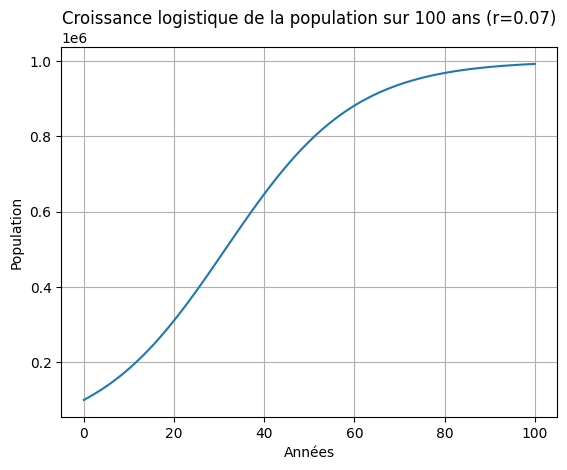

In [4]:
# Modelisation
## Parameters
N_0 = 100000 # initial population
K = 1000000 # la capacit√© de charge de l'environnement
r = 0.07 #growth rate, pour un pays africain ou d'asie du sud est(ou ouest)
### On suppose que dt est de l'ordre de le l'ann√©e
## On suppose que la simulation se passe sur un  100 ans.
T = np.linspace(0, 100, 100)

## L'evolution de la population :
N = K/(1 + ((K - N_0)/N_0)*np.exp(-r*T))

# Cr√©ation d'une nouvelle figure
plt.figure()

# Trac√© des r√©sultats
plt.plot(T, N, label='Population')
plt.xlabel('Ann√©es')
plt.ylabel('Population')
plt.title(f'Croissance logistique de la population sur {round(np.max(T))} ans (r={r})')
plt.grid(True)  # Ajout de la grille
plt.show()

#### Avec taux de croissance variable (Sigmo√Øde)

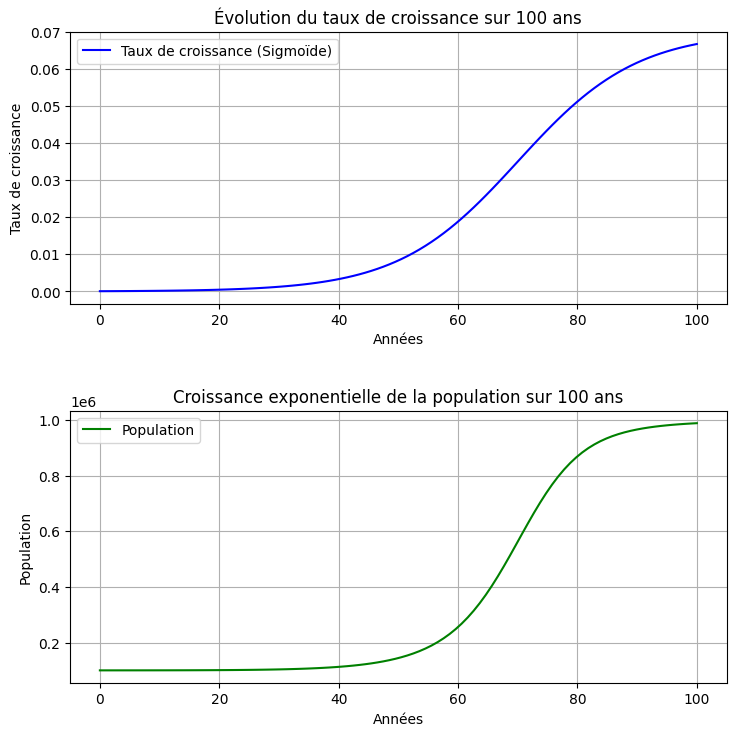

In [6]:
# Mod√©lisation de la croissance d√©mographique

## Param√®tres
N_0 = 100000  # Population initiale
r_max = 0.07  # Taux de croissance maximal, adapt√© pour un pays africain ou d'Asie du Sud-Est (ou Ouest)
K = 1000000 # la capacit√© de charge de l'environnement
T_0 = 70  # L'ann√©e o√π la croissance est la plus rapide
a = 0.1  # Vitesse √† laquelle la croissance s'acc√©l√®re
### On suppose que dt est de l'ordre de l'ann√©e

## Simulation sur 100 ans
T = np.linspace(0, 100, 100)  # Temps simul√© sur 100 ans

## Fonction du taux de croissance : fonction Sigmo√Øde
r = r_max / (1 + np.exp(-a * (T - T_0)))

## √âvolution de la population :
N = K/(1 + ((K - N_0)/N_0)*np.exp(-r*T))

# Cr√©ation d'une nouvelle figure avec des sous-graphiques
fig, axs = plt.subplots(2, figsize=(8, 8))  # Ajustement de la taille de la figure

# Trac√© du taux de croissance
axs[0].plot(T, r, label="Taux de croissance (Sigmo√Øde)", color='blue')
axs[0].set_title(f'√âvolution du taux de croissance sur {round(np.max(T))} ans')
axs[0].set_xlabel('Ann√©es')
axs[0].set_ylabel('Taux de croissance')
axs[0].grid(True)
axs[0].legend()

# Trac√© de la population
axs[1].plot(T, N, label="Population", color='green')
axs[1].set_title(f'Croissance exponentielle de la population sur {round(np.max(T))} ans')
axs[1].set_xlabel('Ann√©es')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Affichage du graphique
plt.show()

### Avec taux de croissance variable( fonction gaussienne)

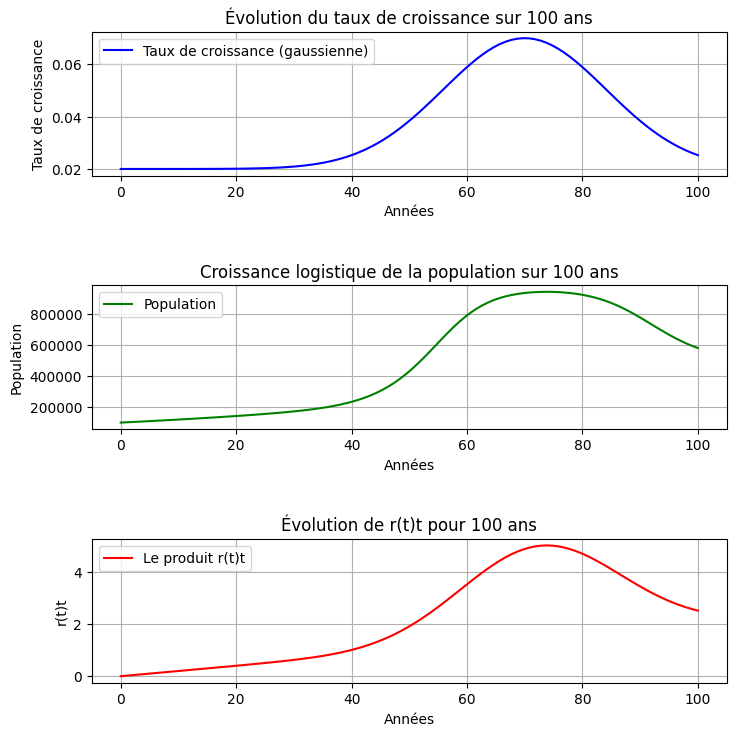

In [12]:
# Mod√©lisation de la croissance d√©mographique

## Param√®tres
N_0 = 100000  # Population initiale
A = 0.05  # √©cart maximale (~7% sera lee taux de croissance au milieu)
min_val = 0.02 # le taux de croissance minimal. Le taux de croissance maximal sera min_val + A
K = 1000000 # la capacit√© de charge de l'environnement
T_0 = 70  # L'ann√©e o√π la fonction atteint son maximum (au milieu de la p√©riode)
b = 20  # Largeur de la cloche (contr√¥le la dur√©e de la phase de croissance)
### On suppose que dt est de l'ordre de l'ann√©e

## Simulation sur 100 ans
T = np.linspace(0, 100, 100)  # Temps simul√© sur 100 ans

## Fonction du taux de croissance :
r = min_val + A*np.exp(-1 * ((T - T_0)/b)**2)

## √âvolution de la population :
N = K/(1 + ((K - N_0)/N_0)*np.exp(-r*T))

## Le produit rt:
r_t = r*T

# Cr√©ation d'une nouvelle figure avec des sous-graphiques
fig, axs = plt.subplots(3, figsize=(8, 8))  # Ajustement de la taille de la figure

# Trac√© du taux de croissance
axs[0].plot(T, r, label="Taux de croissance (gaussienne)", color='blue')
axs[0].set_title(f'√âvolution du taux de croissance sur {round(np.max(T))} ans')
axs[0].set_xlabel('Ann√©es')
axs[0].set_ylabel('Taux de croissance')
axs[0].grid(True)
axs[0].legend()

# Trac√© de la population
axs[1].plot(T, N, label="Population", color='green')
axs[1].set_title(f'Croissance logistique de la population sur {round(np.max(T))} ans')
axs[1].set_xlabel('Ann√©es')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Trac√© du taux de croissance
axs[2].plot(T, r_t, label="Le produit r(t)t", color='red')
axs[2].set_title(f'√âvolution de r(t)t pour {round(np.max(T))} ans')
axs[2].set_xlabel('Ann√©es')
axs[2].set_ylabel('r(t)t')
axs[2].grid(True)
axs[2].legend()

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Affichage du graphique
plt.show()

#### Commentaires
Dans les mod√®les **exponentiel** et **logistique** avec un taux de croissance variable, simul√© par une fonction gaussienne, on observe une d√©croissance de la population √† partir d'un certain temps \( T_0 \), lorsque le taux de croissance commence √† diminuer. Toutefois, la d√©croissance est beaucoup plus lente dans le mod√®le logistique que dans le mod√®le exponentiel.

Dans le mod√®le exponentiel, la population d√©pend directement du taux de croissance \( r \). Comme \( r \) diminue avec la fonction gaussienne, la population suit imm√©diatement cette d√©croissance sans m√©canisme de r√©gulation, ce qui conduit √† une diminution rapide et continue. 

Dans le mod√®le logistique, en revanche, la capacit√© de charge \( K \) introduit un m√©canisme de r√©gulation. Ce terme \( K \) emp√™che la population de cro√Ætre trop rapidement lorsque \( r \) est en phase ascendante, mais il freine aussi la d√©croissance lorsque \( r \) diminue. En quelque sorte, \( K \) agit comme un amortisseur, en ralentissant les fluctuations, que ce soit dans la phase de croissance ou de d√©croissance. 

M√™me lorsque \( r \) diminue dans le mod√®le logistique, la population tend √† rester r√©gul√©e autour de \( K \), ce qui ralentit la d√©croissance compar√©e √† celle du mod√®le exponentiel. Ainsi, le mod√®le logistique att√©nue l'impact des variations du taux de croissance, contrairement au mod√®le exponentiel o√π la population est bien plus directement affect√©e par les fluctuations de \( r \).

### Mod√®le logistique avec effet Allee

#### Th√©orie du mod√®le avec effet Allee

L'**effet Allee** mod√©lise un ph√©nom√®ne dans lequel une population doit atteindre un certain **seuil critique**, appel√© **seuil d'Allee**, pour pouvoir cro√Ætre. Si la population est en dessous de ce seuil, elle tend √† d√©cliner jusqu'√† l'extinction. Si elle d√©passe ce seuil, elle cro√Æt jusqu'√† atteindre une **capacit√© de charge** \(K\), c'est-√†-dire la population maximale que l'environnement peut supporter.

#### L'√©quation diff√©rentielle du mod√®le logistique avec effet Allee

L'√©quation de base du mod√®le logistique est : 
$$
\frac{dN}{dt} = r N \left(1 - \frac{N}{K}\right)
$$

o√π :
- \(N(t)\) est la taille de la population √† l'instant \(t\),
- \(r\) est le taux de croissance intrins√®que,
- \(K\) est la capacit√© de charge de l'environnement.

Dans le mod√®le avec effet Allee, on introduit un **seuil critique** \(N_c\), et l'√©quation devient :

$$
\frac{dN}{dt} = r N \left(1 - \frac{N}{K}\right) \left( \frac{N}{N_c} - 1 \right)
$$

###" Dynamique de la population :
- Si \(N < N_c\), la population d√©cro√Æt.
- Si \(N > N_c\), la population cro√Æt vers \(K\).

#### R√©solution de l'√©quation :
Cette √©quation n'a pas de solution analytique simple. Cependant, elle peut √™tre r√©solue num√©riquement √† l'aide de m√©thodes telles que **Euler** ou **Runge-Kutta** pour simuler l'√©volution de la population au cours du temps.


#### Le seuil d'Allee et les caract√©ristiques biologiques

Le **seuil d'Allee** est principalement d√©termin√© par des **facteurs intrins√®ques √† l'esp√®ce**, tels que :

- **Le taux de reproduction** : Certaines esp√®ces, comme les lapins ou les rats, ont un taux de f√©condit√© tr√®s √©lev√©. M√™me une petite population peut cro√Ætre rapidement. En revanche, pour des esp√®ces √† long temps de gestation ou avec un comportement reproductif plus rare (comme les √©l√©phants ou les grands carnivores), il faut un groupe suffisamment grand pour que la reproduction soit efficace.

- **Les comportements sociaux** : Certaines esp√®ces n√©cessitent un certain nombre d'individus pour des activit√©s collectives, comme la chasse ou la protection contre les pr√©dateurs. Par exemple, les loups ou les lions, qui chassent en meute, ont besoin d'un nombre minimum d'individus pour chasser efficacement.

- **Le risque de consanguinit√©** : Si une population est trop petite, les chances de reproduction entre individus proches g√©n√©tiquement augmentent, ce qui peut r√©duire la diversit√© g√©n√©tique et rendre la population plus vuln√©rable aux maladies ou aux changements environnementaux.


#### Seuil d'Allee et conditions environnementales

Il est possible que le **seuil d'Allee** puisse varier indirectement en raison de **changements environnementaux** qui influencent le comportement ou la survie des esp√®ces. Par exemple, si des conditions environnementales drastiques changent (r√©duction des pr√©dateurs ou augmentation de la nourriture disponible), une population initialement trop petite pour cro√Ætre pourrait avoir de meilleures chances de survie. Toutefois, ces changements environnementaux affectent davantage la **capacit√© de charge** \(K\) que le seuil d'Allee, qui reste principalement li√© aux comportements reproductifs et sociaux.


### Mod√©lisation avec le seuil d'Allee constant

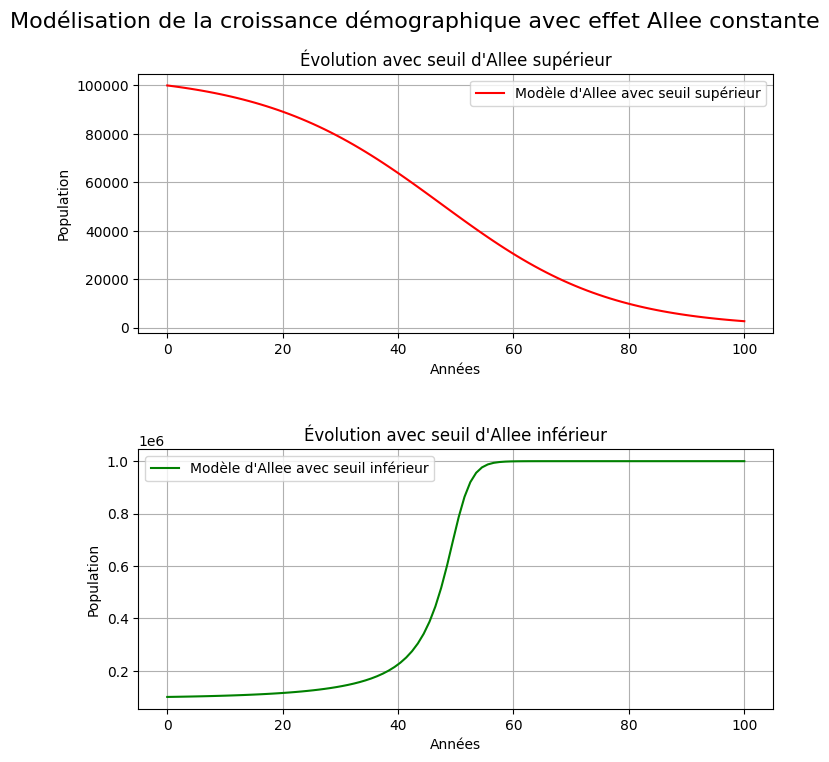

In [20]:
# Param√®tres
N_0 = 100000  # Population initiale
N_c_inf = 95000  # Seuil d'Allee inf√©rieur
N_c_sup = 105000  # Seuil d'Allee sup√©rieur
K = 1000000  # Capacit√© de charge de l'environnement
T = np.linspace(0, 100, 100)  # Temps simul√© sur 100 ans
r = 0.07  # Taux de croissance

# Mod√®le ODE pour la simulation
def model(y, t, r, N_c, K):
    dydt = r * y * (1 - y / K) * (y / N_c - 1)
    return dydt

# R√©solutions de l'√©quation avec odeint
y_sup = odeint(model, N_0, T, args=(r, N_c_sup, K))
y_inf = odeint(model, N_0, T, args=(r, N_c_inf, K))

# Cr√©ation d'une figure avec des sous-graphiques
fig, axs = plt.subplots(2, figsize=(8, 8))

# Trac√© avec seuil sup√©rieur
axs[0].plot(T, y_sup, label="Mod√®le d'Allee avec seuil sup√©rieur", color='red')
axs[0].set_title(f"√âvolution avec seuil d'Allee sup√©rieur")
axs[0].set_xlabel('Ann√©es')
axs[0].set_ylabel('Population')
axs[0].grid(True)
axs[0].legend()

# Trac√© avec seuil inf√©rieur
axs[1].plot(T, y_inf, label="Mod√®le d'Allee avec seuil inf√©rieur", color='green')
axs[1].set_title(f"√âvolution avec seuil d'Allee inf√©rieur")
axs[1].set_xlabel('Ann√©es')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Ajouter un titre global √† l'ensemble de la figure
fig.suptitle('Mod√©lisation de la croissance d√©mographique avec effet Allee constante', fontsize=16)

# Ajustement de l'espace entre les sous-graphes
fig.tight_layout(pad=3.0)

# Ajustement du titre global pour ne pas le superposer aux sous-graphiques
fig.subplots_adjust(top=0.9)

# Affichage du graphique
plt.show()

### Mod√©lisation avec le seuil d'Allee variable

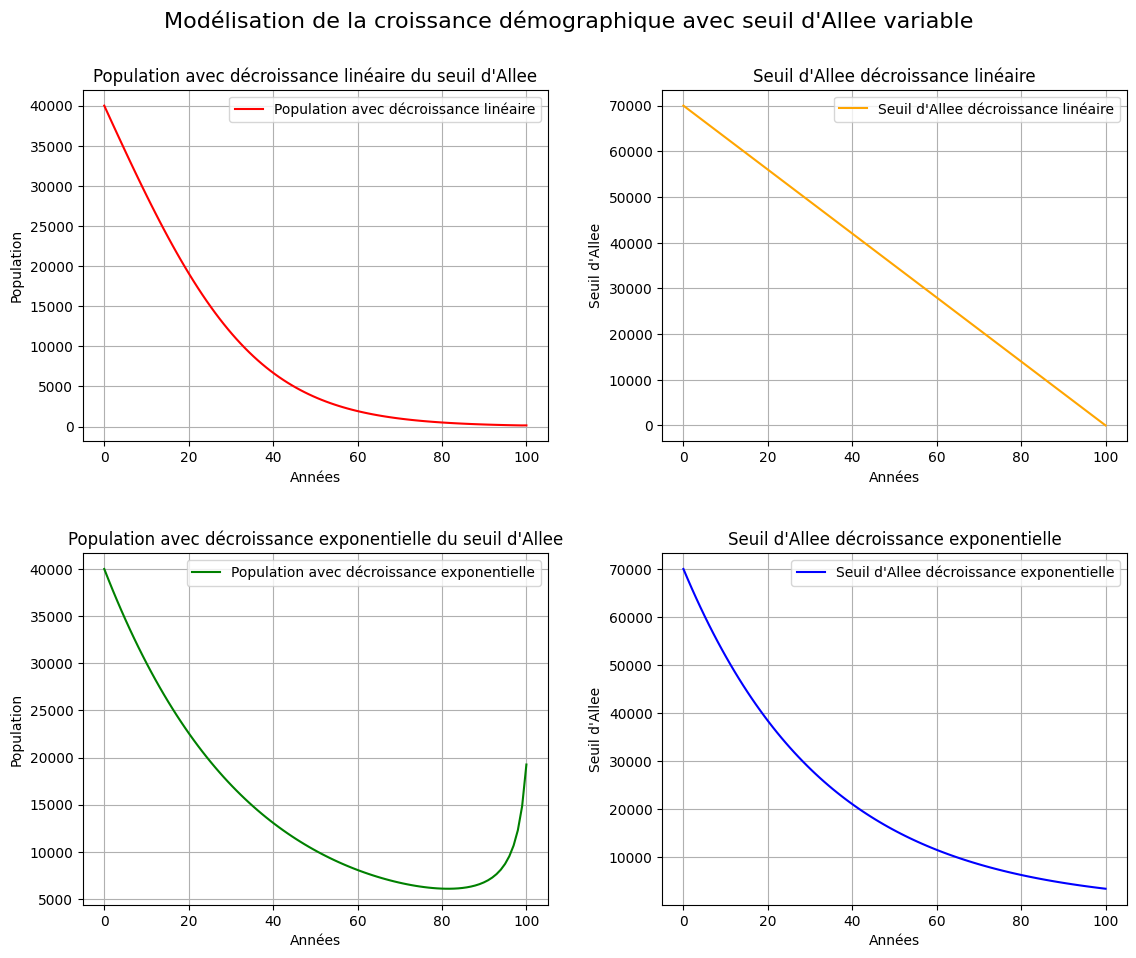

In [59]:
# Param√®tres
N_0 = 40000  # Population initiale
N_c_0 = 70000  # Seuil d'Allee initial
beta = 700  # Param√®tre de d√©croissance lin√©aire
alpha = 0.03  # Param√®tre de d√©croissance exponentielle
K = 1000000  # Capacit√© de charge de l'environnement
T = np.linspace(0, 100, 100)  # Temps simul√© sur 100 ans
r = 0.07  # Taux de croissance

# Simulation du seuil d'Allee avec d√©croissance lin√©aire
def linear_decrease(t, N_c_0, beta):
    lin = N_c_0 - beta * t
    return np.maximum(lin, 1)  # Assure que le seuil ne devienne pas n√©gatif

# Simulation du seuil d'Allee avec d√©croissance exponentielle
def exp_decrease(t, N_c_0, alpha):
    exp = N_c_0 * np.exp(-alpha * t)
    return np.maximum(1,exp)

# Mod√®le ODE avec d√©croissance lin√©aire du seuil d'Allee
def model_d_lin(y, t, r, N_c_0, beta, K):
    N_c = linear_decrease(t, N_c_0, beta)
    dydt = r * y * (1 - y / K) * (y / N_c - 1)
    return dydt

# Mod√®le ODE avec d√©croissance exponentielle du seuil d'Allee
def model_d_exp(y, t, r, N_c_0, alpha, K):
    N_c = exp_decrease(t, N_c_0, alpha)
    dydt = r * y * (1 - y / K) * (y / N_c - 1)
    return dydt

# R√©solution de l'ODE avec odeint pour d√©croissance lin√©aire et exponentielle
y_d_lin = odeint(model_d_lin, N_0, T, args=(r, N_c_0, beta, K))
y_d_exp = odeint(model_d_exp, N_0, T, args=(r, N_c_0, alpha, K))

# Calcul des seuils d'Allee pour chaque cas
Nc_lin_values = np.array([linear_decrease(t, N_c_0, beta) for t in T])
Nc_exp_values = exp_decrease(T, N_c_0, alpha)

# Cr√©ation d'une figure avec 4 sous-graphiques (2x2)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Trac√© de la population avec d√©croissance lin√©aire du seuil d'Allee
axs[0, 0].plot(T, y_d_lin, label="Population avec d√©croissance lin√©aire", color='red')
axs[0, 0].set_xlabel('Ann√©es')
axs[0, 0].set_ylabel('Population')
axs[0, 0].set_title('Population avec d√©croissance lin√©aire du seuil d\'Allee')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Trac√© du seuil d'Allee avec d√©croissance lin√©aire
axs[0, 1].plot(T, Nc_lin_values, label="Seuil d'Allee d√©croissance lin√©aire", color='orange')
axs[0, 1].set_xlabel('Ann√©es')
axs[0, 1].set_ylabel('Seuil d\'Allee')
axs[0, 1].set_title('Seuil d\'Allee d√©croissance lin√©aire')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Trac√© de la population avec d√©croissance exponentielle du seuil d'Allee
axs[1, 0].plot(T, y_d_exp, label="Population avec d√©croissance exponentielle", color='green')
axs[1, 0].set_xlabel('Ann√©es')
axs[1, 0].set_ylabel('Population')
axs[1, 0].set_title('Population avec d√©croissance exponentielle du seuil d\'Allee')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Trac√© du seuil d'Allee avec d√©croissance exponentielle
axs[1, 1].plot(T, Nc_exp_values, label="Seuil d'Allee d√©croissance exponentielle", color='blue')
axs[1, 1].set_xlabel('Ann√©es')
axs[1, 1].set_ylabel('Seuil d\'Allee')
axs[1, 1].set_title('Seuil d\'Allee d√©croissance exponentielle')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Ajouter un titre global √† l'ensemble de la figure
fig.suptitle('Mod√©lisation de la croissance d√©mographique avec seuil d\'Allee variable', fontsize=16)

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Ajustement du titre global pour ne pas le superposer aux sous-graphiques
fig.subplots_adjust(top=0.9)

# Affichage du graphique
plt.show()


### Explication th√©orique : Diff√©rences entre d√©croissance lin√©aire et exponentielle

#### 1. D√©croissance lin√©aire : Un ph√©nom√®ne brusque

##### Fonction lin√©aire

La d√©croissance lin√©aire est d√©crite par une fonction du type :

$$ N_c(t) = N_c0 - \beta t $$

o√π :
- $N_c(t)$ est le seuil d'Allee √† l'instant $t$,
- $N_c0$ est le seuil initial,
- $\beta$ est le taux constant de d√©croissance,
- $t$ est le temps.

##### Comportement math√©matique

Dans une d√©croissance lin√©aire, le seuil d'Allee $N_c(t)$ d√©cro√Æt √† un **taux constant**. Cela signifie que, pour chaque unit√© de temps, la diminution de $N_c(t)$ est toujours la m√™me. Par exemple, si $\beta = 500$, alors √† chaque unit√© de temps, le seuil $N_c$ diminue de 500.

###### Exemple :
Si $N_c0 = 50000$ et $\beta = 500$, alors apr√®s 10 ans, le seuil d'Allee sera :

$$ N_c(10) = 50000 - 500 \times 10 = 45000 $$

Apr√®s 20 ans, le seuil sera :

$$ N_c(20) = 50000 - 500 \times 20 = 40000 $$

Ce type de d√©croissance est rapide et directe, ce qui peut parfois entra√Æner des **changements brusques** lorsque le seuil devient suffisamment bas pour permettre √† la population de d√©passer le seuil d'Allee.

##### Comportement brusque autour de certaines valeurs de $\beta$

Quand tu as observ√© qu'√† $\beta = 700$ le comportement est similaire √† celui √† $\beta = 500$, cela est d√ª au fait que la d√©croissance lin√©aire reste r√©guli√®re et le seuil descend de mani√®re pr√©dictible. Cependant, quand tu changes $\beta$ √† 701, cela peut entra√Æner un **point de basculement** o√π le seuil $N_c(t)$ devient suffisamment bas pour permettre √† la population de recro√Ætre brusquement.

Cela peut √™tre caus√© par une interaction d√©licate entre le seuil $N_c(t)$ et la dynamique de la population, qui est mod√©lis√©e par une fonction de type logistique. Une petite variation de $\beta$ peut donc entra√Æner un changement soudain dans le comportement de la population.

##### Probl√®me avec la d√©croissance lin√©aire

Le probl√®me de la d√©croissance lin√©aire est que le seuil diminue de mani√®re constante, et si la population n‚Äôa pas le temps de r√©agir au changement du seuil, elle peut se retrouver bloqu√©e en dessous de ce seuil pour longtemps. Cela explique pourquoi, m√™me avec une petite variation de $\beta$, tu observes un comportement totalement diff√©rent.

#### 2. D√©croissance exponentielle : Un ph√©nom√®ne plus doux

##### Fonction exponentielle

La d√©croissance exponentielle est d√©crite par une fonction du type :

$$ N_c(t) = N_c0 \times e^{-\alpha t} $$

o√π :
- $N_c(t)$ est le seuil d'Allee √† l'instant $t$,
- $N_c0$ est le seuil initial,
- $\alpha$ est le taux de d√©croissance exponentielle,
- $t$ est le temps.

##### Comportement math√©matique

Contrairement √† la d√©croissance lin√©aire, la d√©croissance exponentielle ralentit avec le temps. Cela signifie que, au d√©but, la d√©croissance est rapide, mais au fil du temps, le seuil $N_c(t)$ diminue de moins en moins.

###### Exemple :
Si $N_c0 = 50000$ et $\alpha = 0.02$, alors apr√®s 10 ans, le seuil d'Allee sera :

$$ N_c(10) = 50000 \times e^{-0.02 \times 10} \approx 40932 $$

Apr√®s 20 ans, le seuil sera :

$$ N_c(20) = 50000 \times e^{-0.02 \times 20} \approx 33516 $$

Et apr√®s 50 ans :

$$ N_c(50) = 50000 \times e^{-0.02 \times 50} \approx 22119 $$

On voit ici que la d√©croissance exponentielle **ralentit** avec le temps, ce qui permet √† la population de r√©agir plus progressivement aux changements du seuil. Cela √©vite des comportements brusques ou soudains et explique pourquoi cette approche est plus "douce".

##### Avantages de la d√©croissance exponentielle

- La d√©croissance exponentielle modifie le seuil plus progressivement, laissant ainsi le temps √† la population de r√©agir.
- Contrairement √† la d√©croissance lin√©aire, elle ne force pas un changement brutal, mais cr√©e une transition plus naturelle.
- Les interactions avec la dynamique de la population deviennent plus pr√©visibles et contr√¥l√©es avec ce type de d√©croissance.

### Mod√®le de m√©tapopulation (Levins)

L'√©quation diff√©rentielle du mod√®le logistique de Verhulst se pr√©sente comme suit : $$ \frac{dN}{dt} = cN(1 - N) - eN $$
o√π :

- $N$ est la fraction d'habitats occup√©s √† l'instant $ùë°$.
- $c$ est le taux de colonisation.
- $e$ est le taux d'extinction.

In [3]:
# Fonction du mod√®le de Levins
def levins_model(x, t, c, e):
    dxdt = c * x * (1 - x) - e * x
    return dxdt

# Fonction pour tracer le mod√®le et sauvegarder le graphe
def plot_model(x_0, c, e):
    T_span = (0, 100)
    T = np.linspace(*T_span, 1000)
    sol = odeint(levins_model, x_0/100, T, args=(c, e))  # Normalisation de x_0
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(T, sol, label='Fraction de la population')
    ax.set_xlabel('Ann√©es')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Mod√®le de Levins sur {round(np.max(T))} ans')
    ax.legend()
    ax.grid(True)
    
    plt.show()
    
    # Fonction de sauvegarde
    def save_graph(b):
        fig.savefig('modele_levins.png')
        print("Graphique enregistr√© sous 'modele_levins.png'")
    
    # Cr√©ation d'un bouton avec ipywidgets
    save_button = Button(description="Save Graph")
    save_button.on_click(save_graph)
    
    # Affichage du bouton dans la cellule
    display(save_button)

# Curseurs interactifs et affichage
interactive_plot = interactive(plot_model,
                               x_0=widgets.IntSlider(min=10, max=100, step=5, value=50, description='Fraction initiale (%)'),
                               c=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='Taux de colonisation'),
                               e=widgets.FloatSlider(min=0.01, max=0.1, step=0.01, value=0.02, description='Taux d\'extinction'))

# Affichage du plot interactif avec les widgets
display(VBox([interactive_plot]))